# Interesting classification datasets from OpenML
Here is a selection of some OpenML CC-18 datasets that looks "interesting" in some way.
Many of these are classical UCI datsets.
These are selected either because the visualizations tell us a lot about the data, or because they illustrate difficulties with the current visualizations.
You can find more here: https://www.openml.org/search?q=tags.tag%3Acc18&type=data

In [1]:
from dabl import plot_supervised
from sklearn.datasets import fetch_openml
from dabl.utils import data_df_from_bunch

(1080, 78)
Target looks like classification
Showing only top 10 of 77 continuous features


/home/andy/checkout/dabl/dabl/plot/utils.py:543: UserWarning: Dropped 1 outliers in column P38_N.
  int(dropped), series.name), UserWarning)
/home/andy/checkout/dabl/dabl/plot/utils.py:543: UserWarning: Dropped 1 outliers in column pERK_N.
  int(dropped), series.name), UserWarning)
/home/andy/checkout/scikit-learn/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


Linear Discriminant Analysis training set score: 0.992


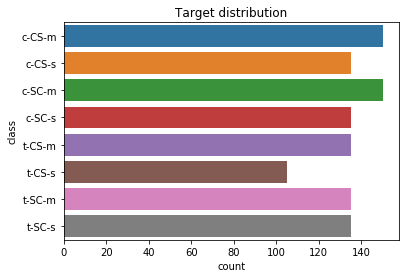

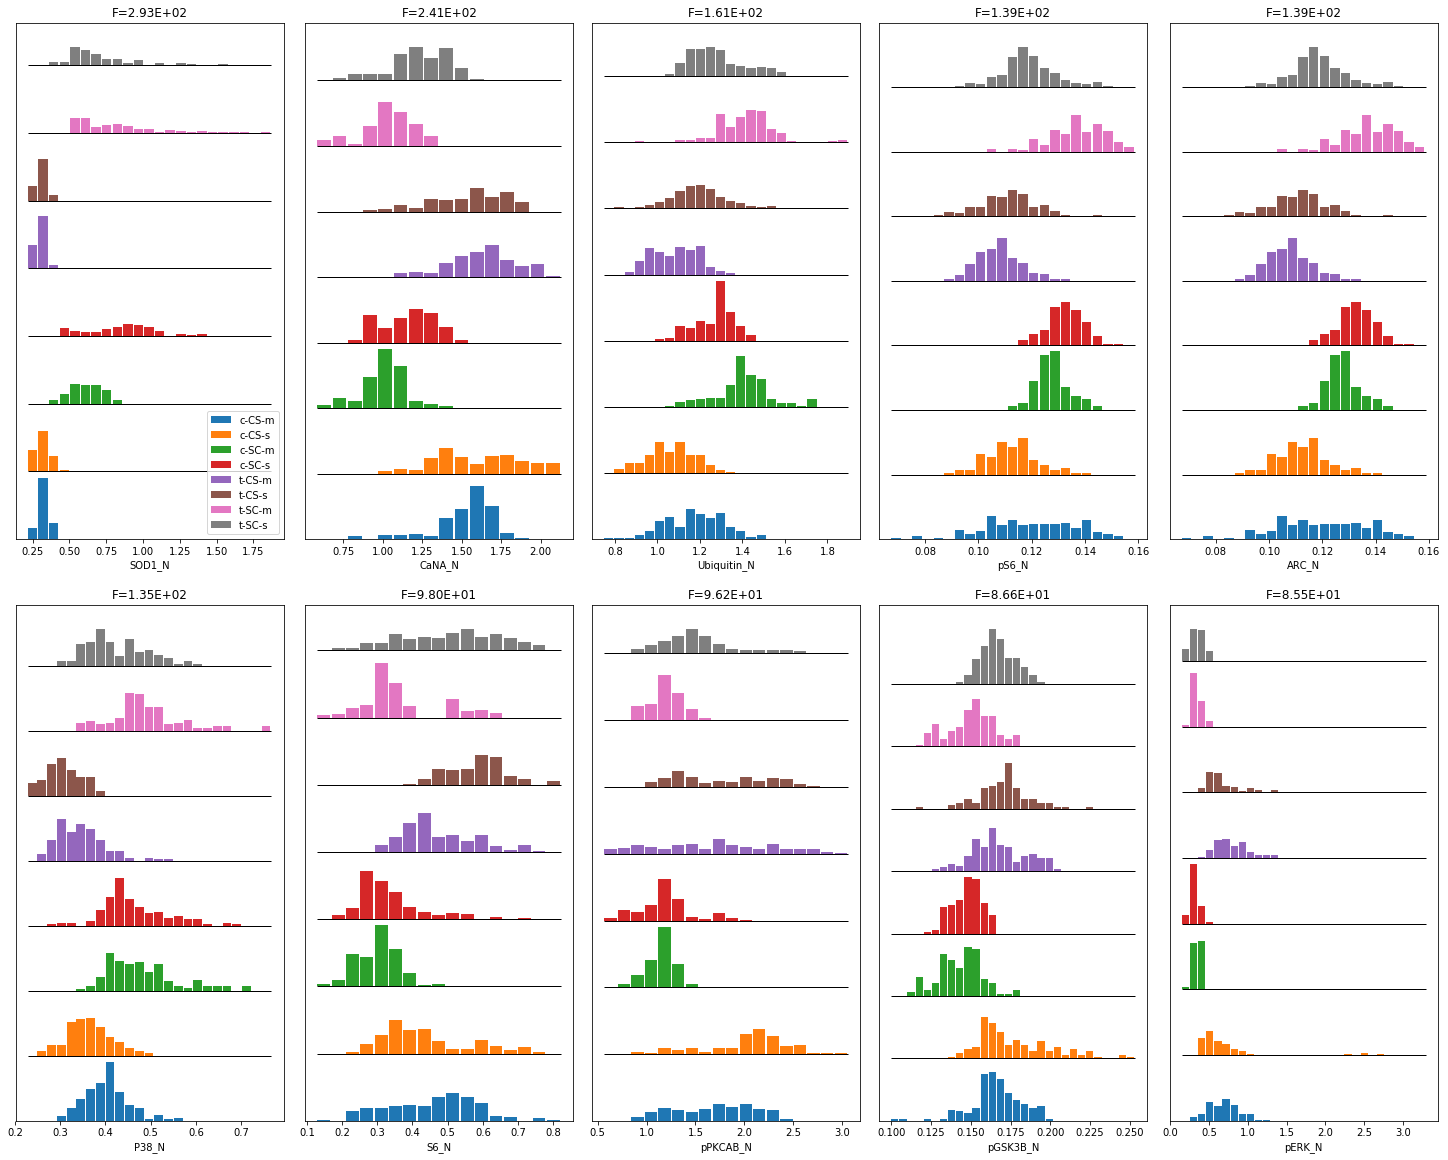

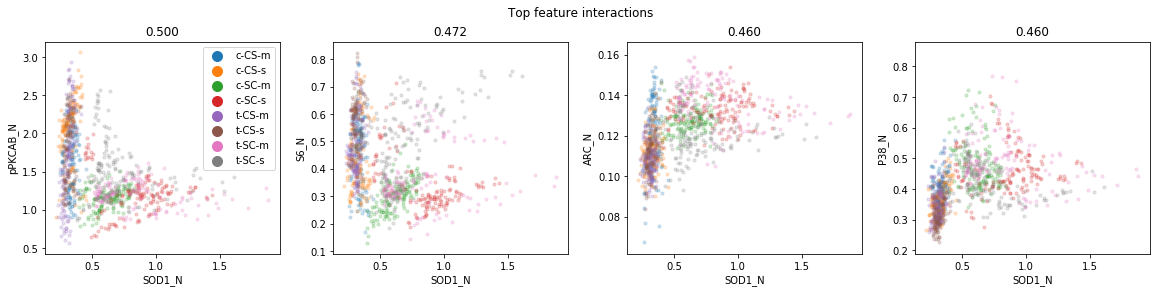

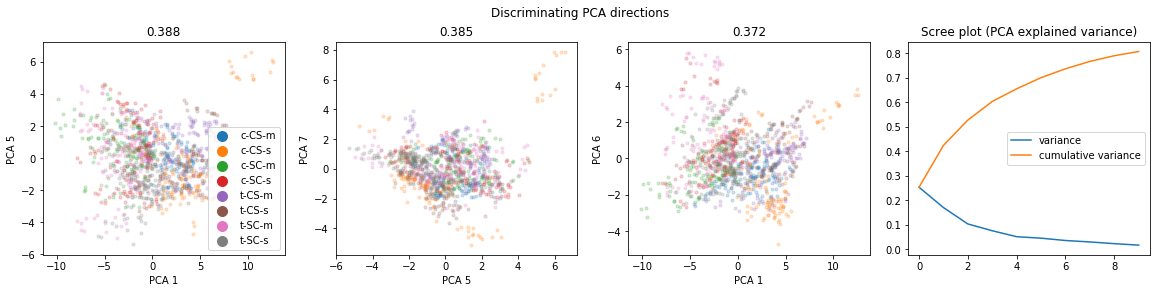

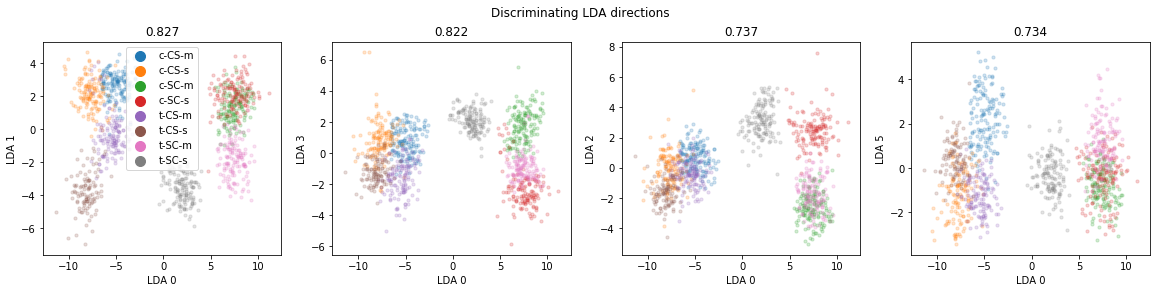

In [14]:
# a relatively small continuous dataset with 8 classes:
# LDA works well on this.
data = fetch_openml('MiceProtein')

# Similarly LDA working suprisingly well, everything continuous, 10 classes:
#data = fetch_openml('mfeat-factors')

# Interesting mix of ordinal features
# hard to say whether out heuristics are doing a good job
# Might be interesting to use target hints to make everything continuous or everything categorical
# data = fetch_openml('eucalyptus')

# Classical "isolet" datset has 26 classes
# LDA and PCA look interesting, our class histograms kind of break down in the presence of so many classes
# data = fetch_openml('isolet')

# NASA defect dataset
# Imbalance and heavy tail of distributions makes it tricky to read, PCA is useless
#data = fetch_openml('pc3')

# Human activity Recogniction.
# Out of the 561 features some are amazingly descriptive.
# The first PCA component covers 50% of variance and separates two clusters
# LDA easily solves everything apart from 4 vs 5 (At least not within first 3 components)
#data = fetch_openml('har')

# Interesting feature interactions, though features 18, 19 and 20 that are shown are highly correlated
# LDA and PCA seems not equiped to handle the highly structured data
# data = fetch_openml('wall-robot-navigation')


# Continuous low-dimensional data, but very hard to see anything?!
# The dataset just seems hard. Would be interesting to try with non-linear methods.
# data = fetch_openml('GesturePhaseSegmentationProcessed')


# three class classification with only binary features.
# arguably good application of mosaic plots
# try kind="count" or kind="proportion" for alternative visualizations.
# data = fetch_openml('dna')


# Continuous binary classification, interesting interactions
# LDA basically nails it
# data = fetch_openml('banknote-authentication')

# This looks quite random as the detected categorical,
# but making everything continuous as done below
# shows the structure of the data in LDA.
# data = fetch_openml('balance-scale')
# plot_supervised(data, target_col='target', 
#                  type_hints={'target': 'categorical', 'left-distance': 'continuous',
#                              'right-distance': 'continuous', 'left-weight': 'continuous',
#                              'right-weight':'continuous'})

# Nice continuous balanced 7-class problem
# gras and sky are obviously easy classes, with several
# individual features being strongly discriminating
# several versions of segment, want version 3
# data = fetch_openml(data_id=40984)
## remove the two easy classes for an alternative view:
# data = data_df_from_bunch(data)
# data = data[~data.target.isin(['grass', 'sky'])]
# plot_supervised(data_new, target_col='target',
#                 type_hints={'target': 'categorical'}, top_k_interactions=20)

# Churn binary classification, where all features are very gaussian
# maybe number_customer_service_calls which is recognized as discrete ordinal (see the border on the bar plot)
# should be plotted as discrete?
# data = fetch_openml('churn')

# Bank marketing has some interesting interactions
# and it's unclear how to best show the integer features
# data = fetch_openml('bank-marketing')

data = data_df_from_bunch(data)
print(data.shape)

# we set a type hint for the target to be categorical
# as all these datasets are for classification.
# For most  (but not all, datasets) this would have been detected correctly
# playing with scatter_size can lead to nicer plots
# you can disable pairwise plots with plot_pairwise=False, which will be much faster
plot_supervised(data, target_col='target',
                type_hints={'target': 'categorical'})